In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from scipy import stats
import jenkspy
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('merged_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167431 entries, 0 to 167430
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单号     167431 non-null  float64
 1   用户id    167431 non-null  int64  
 2   建单日期    167431 non-null  object 
 3   商品id    167431 non-null  int64  
 4   商品名称    167431 non-null  object 
 5   金额      167431 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.7+ MB


In [4]:
df.head(5)

,订单号,用户id,建单日期,商品id,商品名称,金额
0,2.019030e+14,99526,2019/3/3,2,会员包年,300.0
1,2.018120e+14,184739,2018/12/20,2,会员包年,300.0
2,2.020060e+14,372188,2020/6/18,2955,直播间年费会员,260.0
3,2.018100e+14,24690,2018/10/16,1363,返利(5年会员),1500.0
4,2.017050e+14,24690,2017/5/9,2,会员包年,300.0


In [78]:
df['建单日期'] = pd.to_datetime(df['建单日期'])

currentDate = dt.datetime(2023,9,1)

rfm = df.groupby('用户id').agg({
    '建单日期': lambda x: (currentDate - x.max()).days / 365.0,
    '订单号': lambda x: len(x),
    '金额': lambda x: x.sum()
}).rename(columns={
    '建单日期': 'Recency',
    '订单号': 'Frequency',
    '金额': 'Monetary'
})

In [15]:
rfm.head(5)

,Recency,Frequency,Monetary
用户id,,,
1,1.994521,1,301.0
3,2.852055,2,600.0
5,6.545205,1,300.0
6,0.304110,5,1096.0
7,4.315068,1,300.0


In [117]:
import pandas as pd

def calculate_users(rfm, recency_bins, frequency_bins):
    """
    Calculate the number of users for each (Recency, Frequency) bin.

    Parameters:
    - rfm_data (pd.DataFrame): DataFrame containing the RFM data.
    - recency_bins (list of int): List of bins for Recency.
    - frequency_bins (list of int): List of bins for Frequency.

    Returns:
    pd.DataFrame: A DataFrame where each element is the number of users in
                  the corresponding (Recency, Frequency) bin.
    """
    # Create an empty DataFrame to store the results
    result = pd.DataFrame(index=frequency_bins, columns=recency_bins, dtype=int)
    
    # Calculate the number of users for each (Recency, Frequency) bin
    for recency in recency_bins:
        for frequency in frequency_bins:
            condition = (rfm['Recency'] <= recency) & (rfm['Frequency'] >= frequency)
            result.loc[frequency, recency] = rfm[condition].shape[0]
    
    return result

recency_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
frequency_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

result = calculate_users(rfm, recency_bins, frequency_bins)

result

,1,2,3,4,5,6,7,8,9,10
1,30350.0,50380.0,58527.0,62396.0,66875.0,70351.0,72353.0,72776.0,72776.0,72776.0
2,24918.0,33052.0,36758.0,38334.0,39863.0,41029.0,41257.0,41257.0,41257.0,41257.0
3,15334.0,19592.0,21675.0,22469.0,23102.0,23419.0,23421.0,23421.0,23421.0,23421.0
4,9982.0,12449.0,13650.0,14028.0,14162.0,14179.0,14179.0,14179.0,14179.0,14179.0
5,6567.0,7890.0,8465.0,8520.0,8528.0,8529.0,8529.0,8529.0,8529.0,8529.0
6,3954.0,4572.0,4720.0,4720.0,4721.0,4722.0,4722.0,4722.0,4722.0,4722.0
7,1931.0,2069.0,2086.0,2086.0,2087.0,2087.0,2087.0,2087.0,2087.0,2087.0
8,361.0,378.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0,381.0
9,49.0,53.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0,55.0
10,11.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0


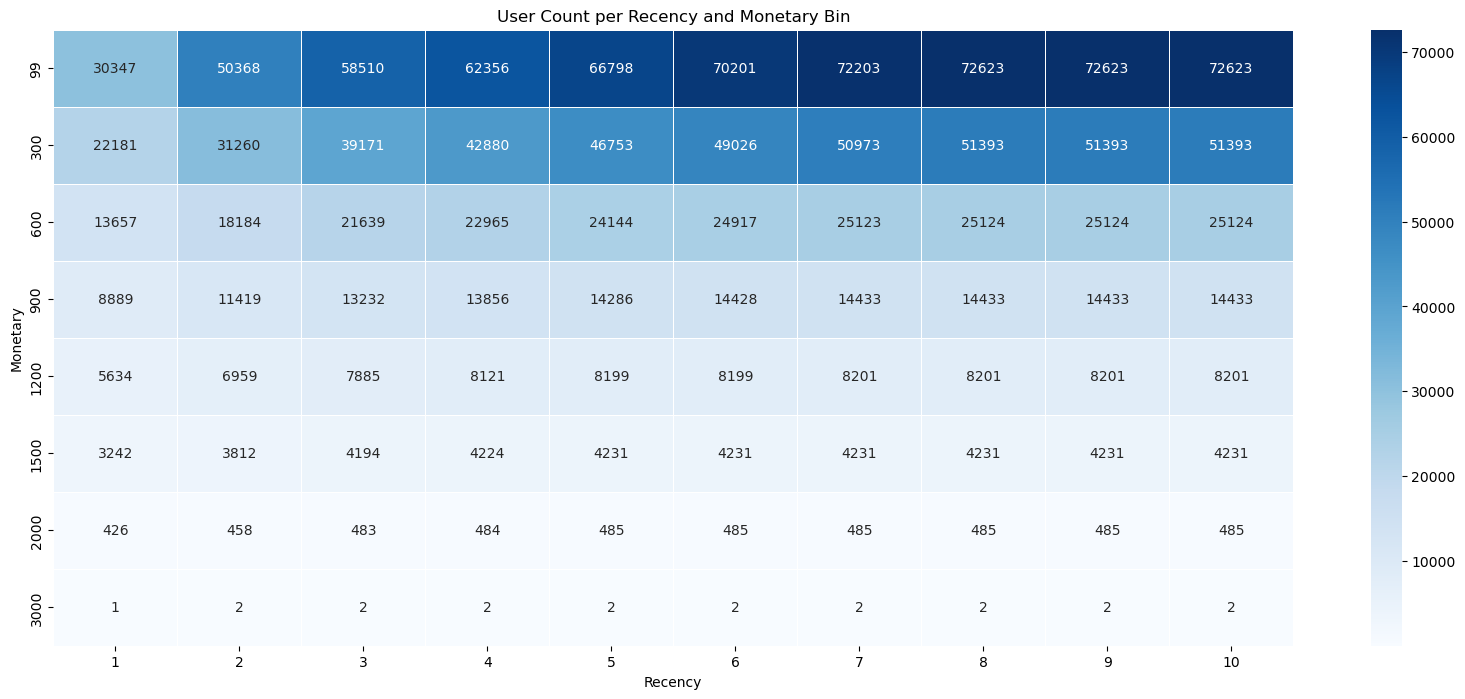

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_heatmap(data, title='Heatmap', xlabel='Recency', ylabel='Monetary', cmap='Blues'):
    """
    Generate a heatmap using seaborn.

    Parameters:
    - data (pd.DataFrame): The data to visualize.
    - title (str): The title of the heatmap. Default is 'Heatmap'.
    - xlabel (str): The label for the x-axis. Default is 'X Label'.
    - ylabel (str): The label for the y-axis. Default is 'Y Label'.
    - cmap (str): The colormap to use. Default is 'Blues'.
    """
    # 设置图形的大小
    plt.figure(figsize=(20, 8))
    
    # 创建一个热力图
    sns.heatmap(result, annot=True, cmap=cmap, fmt='.0f', linewidths=.5)
    
    # 添加标题和轴标签
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # 显示图形
    plt.show()

# 使用函数
# 请注意，我们假设数据已经被正确地格式化，并且索引/列标签已经被设置。
# generate_heatmap(your_data, 'Your Title', 'Your X Label', 'Your Y Label')

generate_heatmap(result, 'User Count per Recency and Monetary Bin', 'Recency', 'Monetary')

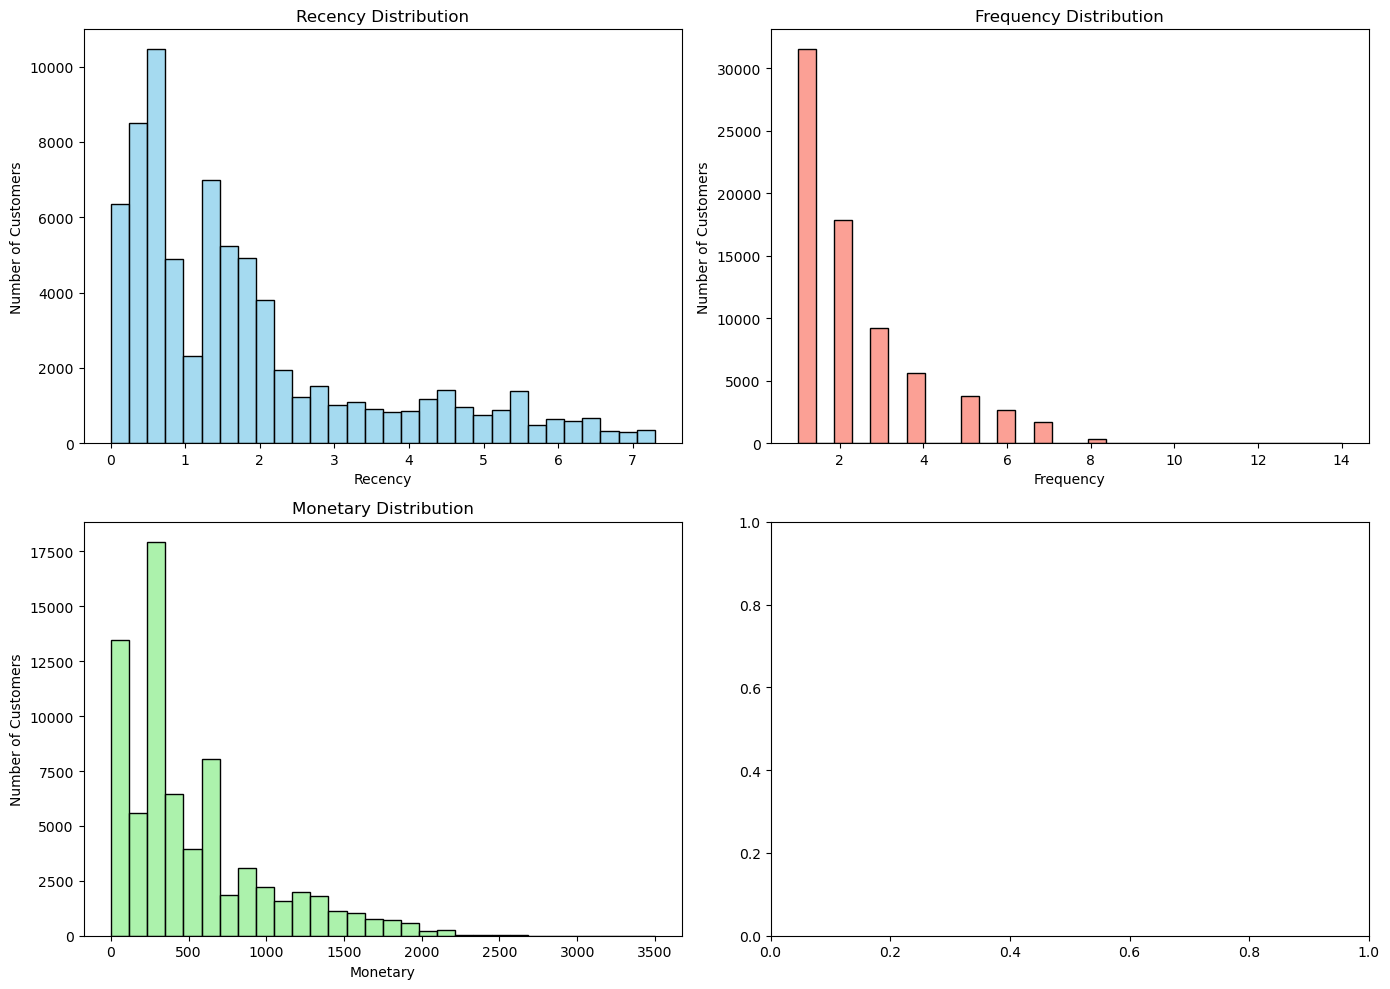

In [37]:
# 创建图形
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Recency分布图
sns.histplot(rfm['Recency'], kde=False, ax=ax[0, 0], bins=30, color='skyblue')
ax[0, 0].set_title('Recency Distribution')
ax[0, 0].set_xlabel('Recency')
ax[0, 0].set_ylabel('Number of Customers')

# Frequency分布图
sns.histplot(rfm['Frequency'], kde=False, ax=ax[0, 1], bins=30, color='salmon')
ax[0, 1].set_title('Frequency Distribution')
ax[0, 1].set_xlabel('Frequency')
ax[0, 1].set_ylabel('Number of Customers')

# Monetary分布图
sns.histplot(rfm['Monetary'], kde=False, ax=ax[1, 0], bins=30, color='lightgreen')
ax[1, 0].set_title('Monetary Distribution')
ax[1, 0].set_xlabel('Monetary')
ax[1, 0].set_ylabel('Number of Customers')



plt.tight_layout()
plt.show()

In [39]:
# 使用hdbscan进行聚类

import hdbscan
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# 数据预处理
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# 使用优化的参数进行聚类
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=2000,
    min_samples=8, 
    metric='euclidean', 
    cluster_selection_epsilon=0.1, 
    alpha=3.5, 
    cluster_selection_method='eom', 
    algorithm='best')
clusterer.fit(rfm_scaled)
rfm['Cluster'] = pd.Series(clusterer.labels_, index=rfm.index)

# 查看结果
print(rfm['Cluster'].value_counts())

 5     15467
 11    11501
 3      9231
 10     5980
 2      5634
 0      4644
 6      4031
 1      3793
 9      3284
 8      3237
 7      2753
 4      2334
-1       887
Name: Cluster, dtype: int64


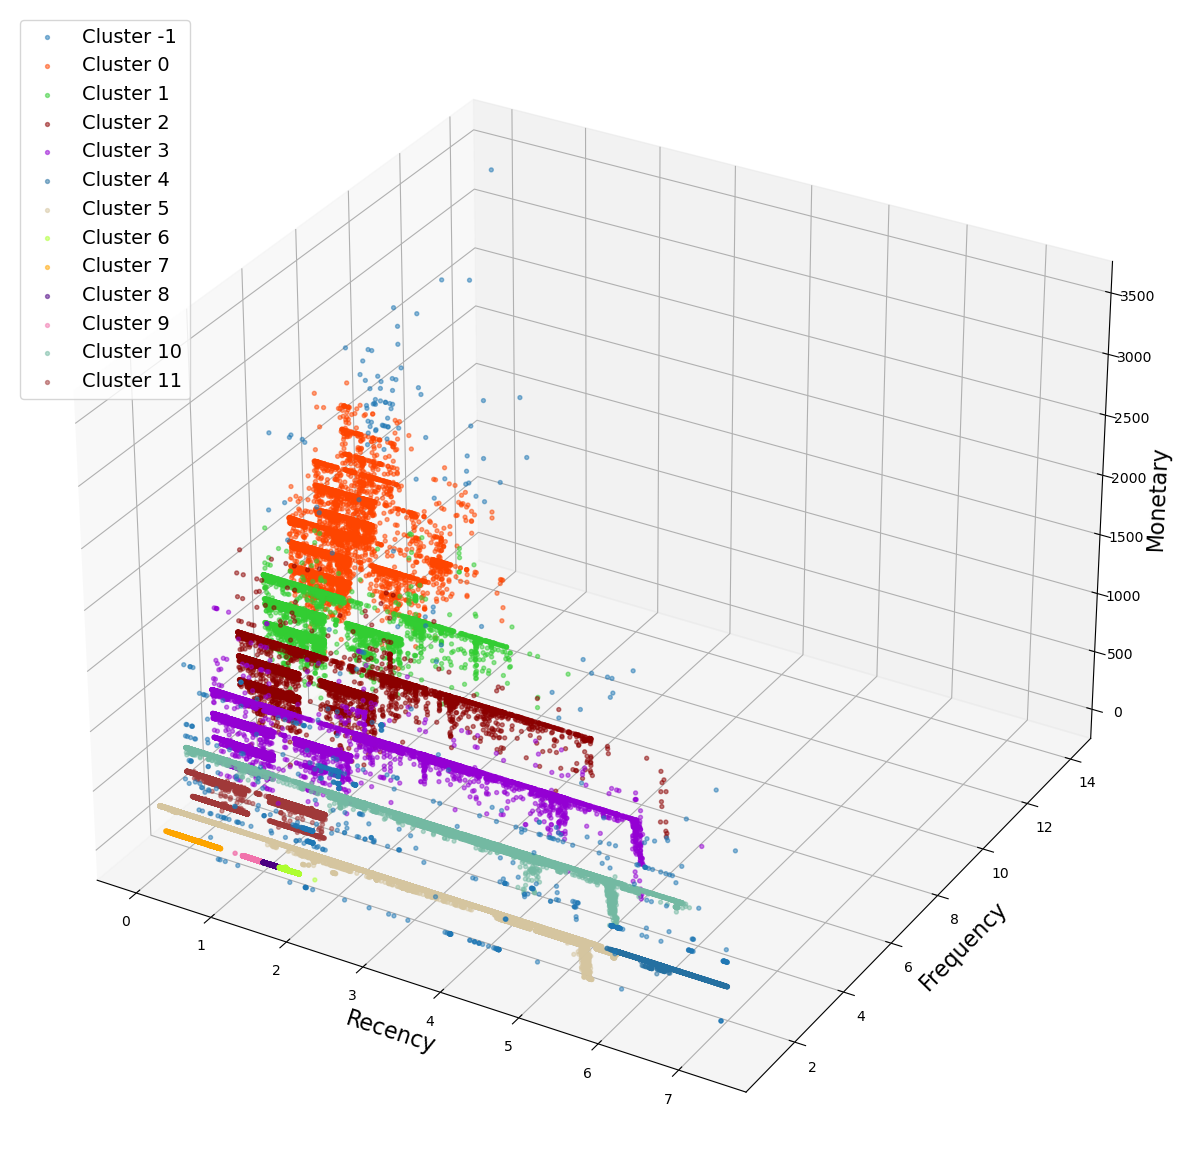

In [43]:
# 使用更为鲜明的颜色组合
colors = [
    "#1f77b4", "#ff4500", "#32cd32", "#8b0000", "#9400d3", "#2570a1", "#d5c59f",
    "#adff2f", "#ffa500", "#4b0082", "#f173ac", "#73b9a2", "#a03939", "#6f599c",
    "#ff1493", "#d2691e", "#00ced1", "#ff69b4", "#ffd700", "#f0dc70", "#007947"
]

# 进一步增加透明度
alpha_value = 0.5

# 保持点的大小
sizes = {cluster: 8 for cluster in rfm['Cluster'].unique()}

fig = plt.figure(figsize=(20, 15))
dx = fig.add_subplot(111, projection='3d')

for i, label in enumerate(sorted(rfm['Cluster'].unique())):
    dx.scatter(rfm[rfm.Cluster == label].Recency,
               rfm[rfm.Cluster == label].Frequency,
               rfm[rfm.Cluster == label].Monetary,
               c=[colors[i]],
               label='Cluster ' + str(label),
               s=sizes[label], alpha=alpha_value)

dx.set_xlabel('Recency', fontsize=16)
dx.set_ylabel('Frequency', fontsize=16)
dx.set_zlabel('Monetary', fontsize=16)
dx.legend(fontsize=14, loc='upper left')
dx.grid(True)  # 保持网格
plt.show()

In [44]:
# 按照四分位对用户进行打分
r_labels = [4, 3, 2, 1]  # r值越高，说明用户越不活跃，因此评分越低
f_labels = [1, 2, 3, 4]  # f值越高，说用户越忠诚，评分越高
m_labels = [1, 2, 3, 4]  # m值越高，说明用户购买了和购买意愿度越高，评分越高

# Assign the quartile values to the respective RFM segments with handling duplicates
rfm['R_Quartile'] = pd.qcut(rfm['Recency'], q=4, labels=r_labels, duplicates='drop')

# Manually classify Frequency based on the proposed bins
rfm['F_Quartile'] = pd.cut(rfm['Frequency'], bins=[0, 1, 2, 3, rfm['Frequency'].max()], labels=f_labels)

# Continue with the previous classification for Recency and Monetary
rfm['M_Quartile'] = pd.qcut(rfm['Monetary'], q=4, labels=m_labels, duplicates='drop')

# Create RFM_Score by combining the R, F, and M quartile values
rfm['RFM_Score'] = rfm['R_Quartile'].astype(str) + rfm['F_Quartile'].astype(str) + rfm['M_Quartile'].astype(str)

rfm.head()


,Recency,Frequency,Monetary,RFM_Score,Cluster,R_Quartile,F_Quartile,M_Quartile
用户id,,,,,,,,
1,1.994521,1,301.0,212,5,2,1,2
3,2.852055,2,600.0,123,10,1,2,3
5,6.545205,1,300.0,112,4,1,1,2
6,0.304110,5,1096.0,444,1,4,4,4
7,4.315068,1,300.0,112,5,1,1,2


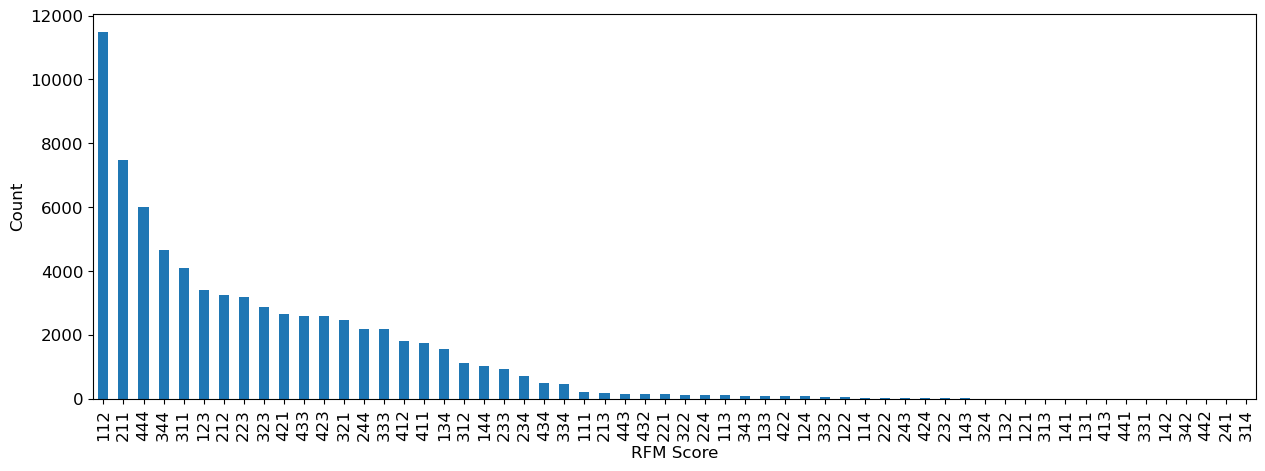

In [45]:
# 可视化
ax = rfm['RFM_Score'].value_counts().plot(kind='bar', figsize=(15, 5), fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [46]:
# 接下来尝试 四分位断点计算RFM 
r_quarters = rfm['Recency'].quantile(q=[0.0, 0.25,0.5,0.75,1]).to_list()
f_quarters = rfm['Frequency'].quantile(q=[0.0, 0.25,0.5,0.75,1]).to_list()
m_quarters = rfm['Monetary'].quantile(q=[0.0, 0.25,0.5,0.75,1]).to_list()
quartile_spread = pd.DataFrame(list(zip(r_quarters, f_quarters, m_quarters)),
    columns=['Q_Recency', 'Q_frequency', 'Q_Monetary'],
    index = ['min', 'first_part','second_part','third_part', 'max'])
quartile_spread

,Q_Recency,Q_frequency,Q_Monetary
min,0.002740,1.0,0.01
first_part,0.553425,1.0,198.00
second_part,1.361644,2.0,301.00
third_part,2.364384,3.0,699.00
max,7.295890,14.0,3499.00


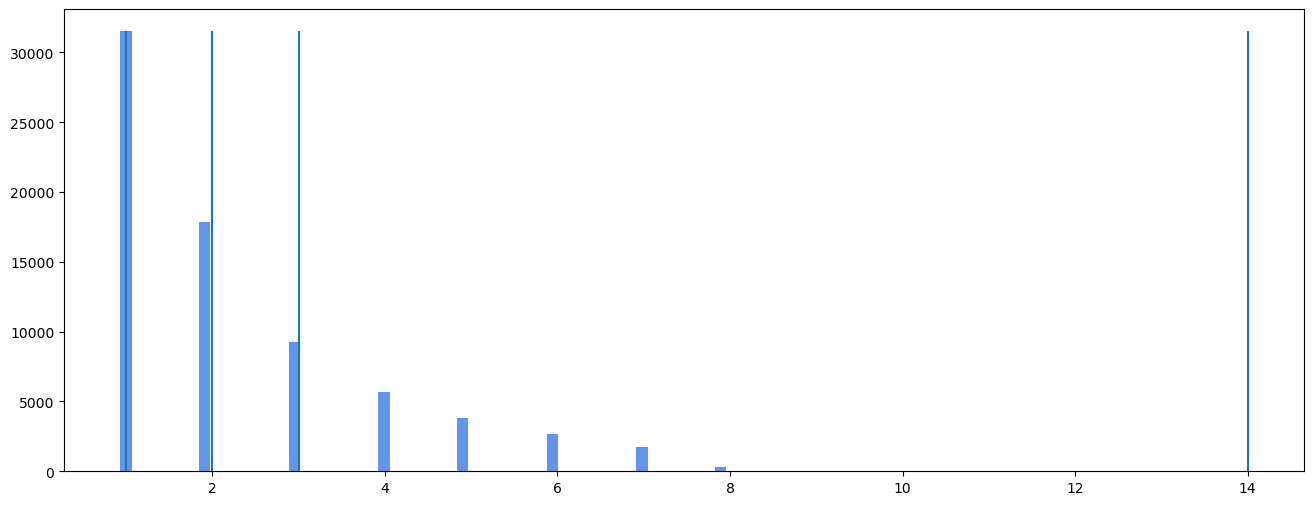

In [47]:
# 可视化Frequency结果
plt.figure(figsize = (16,6))
hist = plt.hist(rfm['Frequency'], bins=100,align='left', color='cornflowerblue')
for q in f_quarters:
    plt.vlines(q, ymin=0, ymax = max(hist[0]))

In [48]:
# 尝试自然分割法进行分组

r_breaks = jenkspy.jenks_breaks(rfm['Recency'], n_classes=4)
f_breaks = jenkspy.jenks_breaks(rfm['Frequency'], n_classes=4)
m_breaks = jenkspy.jenks_breaks(rfm['Monetary'], n_classes=4)
jenks_spread = pd.DataFrame(list(zip(r_breaks, f_breaks, m_breaks)), 
                      columns=['J_Recency','J_Frequency', 'J_Monetary'],
                     index = ['min', 'first_part','second_part','third_part', 'max'])
jenks_spread


,J_Recency,J_Frequency,J_Monetary
min,0.002740,1,0.01
first_part,1.087671,1,427.88
second_part,2.698630,3,841.60
third_part,4.736986,5,1373.20
max,7.295890,14,3499.00


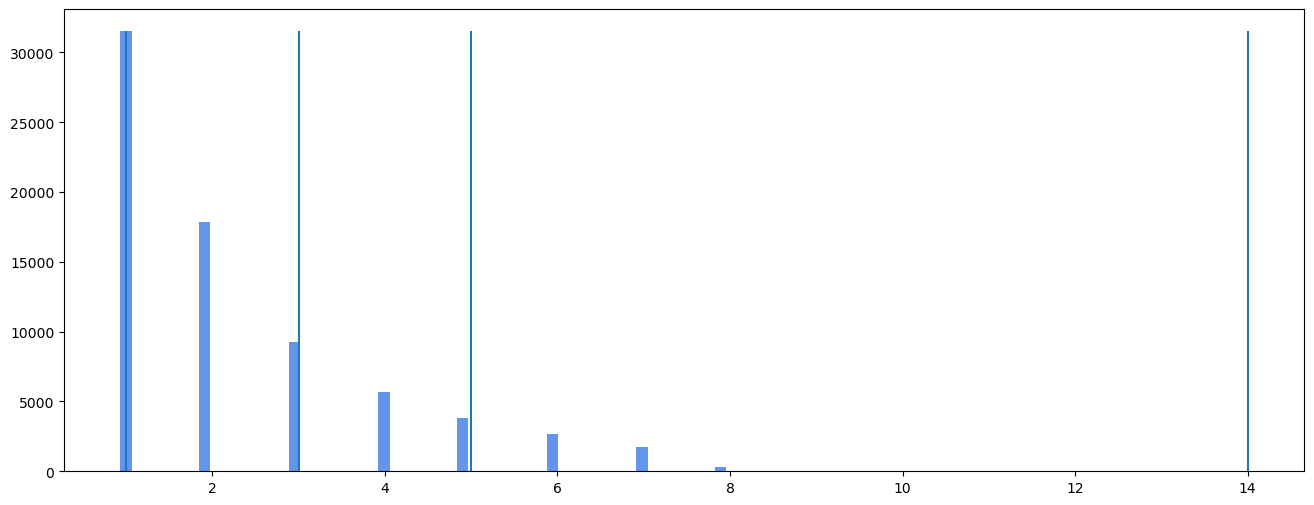

In [49]:
# 可视化 Frequency
plt.figure(figsize = (16,6))
hist = plt.hist(rfm['Frequency'], bins=100,align='left', color='cornflowerblue')
for b in f_breaks:
    plt.vlines(b, ymin=0, ymax = max(hist[0]))

In [50]:
# 比较断点

df = pd.concat([quartile_spread, jenks_spread], axis=1)
cols = ['Q_Recency', 'Q_frequency', 'Q_Monetary', 'J_Recency', 'J_Frequency', 'J_Monetary']
df[cols]


,Q_Recency,Q_frequency,Q_Monetary,J_Recency,J_Frequency,J_Monetary
min,0.002740,1.0,0.01,0.002740,1,0.01
first_part,0.553425,1.0,198.00,1.087671,1,427.88
second_part,1.361644,2.0,301.00,2.698630,3,841.60
third_part,2.364384,3.0,699.00,4.736986,5,1373.20
max,7.295890,14.0,3499.00,7.295890,14,3499.00


In [51]:
# 方差拟合函数

# Crediting camdenl with this function
# https://stats.stackexchange.com/users/27263/camdenl?tab=profile

def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, n_classes=classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array.iloc[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

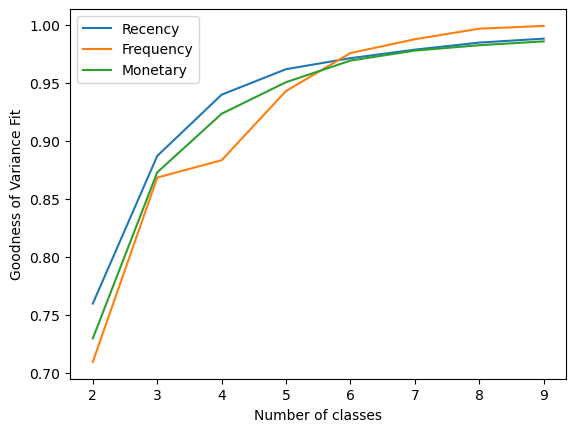

In [52]:
# 确定最佳分段数

my_dict = {}
for col in rfm.columns[:3]:
    results = []
    for i in range(2, 10):
        results.append(goodness_of_variance_fit(rfm[col], i))
    my_dict[col] = results  
plt.plot(range(2, 10), my_dict['Recency'], label='Recency')
plt.plot(range(2, 10), my_dict['Frequency'], label='Frequency')
plt.plot(range(2, 10), my_dict['Monetary'], label='Monetary')
plt.xlabel('Number of classes')
plt.ylabel('Goodness of Variance Fit')
plt.legend(loc='best')
plt.show()

In [54]:
# 选择5为最佳分组方案

breaks_list = [r_breaks, f_breaks, m_breaks]
f_breaks_unique = sorted(set(f_breaks))
f_labels = list(range(len(f_breaks_unique)-1, 0, -1))

rfm['r_j_score'] = pd.cut(rfm['Recency'], bins=r_breaks, labels=[1, 2, 3, 4], include_lowest=True)
rfm['f_j_score'] = pd.cut(rfm['Frequency'], bins=f_breaks_unique, labels=f_labels, include_lowest=True)
rfm['m_j_score'] = pd.cut(rfm['Monetary'], bins=m_breaks, labels=[4, 3, 2, 1], include_lowest=True)

# Drop columns only if they exist in the DataFrame 首先检查要删除的列是否真的存在于 rfm DataFrame 中 
cols_to_drop = ['r_percentile', 'f_percentile', 'm_percentile']
for col in cols_to_drop:
    if col in rfm.columns:
        rfm.drop(col, axis=1, inplace=True)


rfm.head(5)

,Recency,Frequency,Monetary,RFM_Score,Cluster,R_Quartile,F_Quartile,M_Quartile,r_j_score,f_j_score,m_j_score
用户id,,,,,,,,,,,
1,1.994521,1,301.0,212,5,2,1,2,2,3,4
3,2.852055,2,600.0,123,10,1,2,3,3,3,3
5,6.545205,1,300.0,112,4,1,1,2,4,3,4
6,0.304110,5,1096.0,444,1,4,4,4,1,2,2
7,4.315068,1,300.0,112,5,1,1,2,3,3,4


In [55]:
# 合并jenks RFM 分数
rfm['rfm_j_score'] = rfm['r_j_score'].astype(str) + rfm['f_j_score'].astype(str) + rfm['m_j_score'].astype(str)

rfm.head()

,Recency,Frequency,Monetary,RFM_Score,Cluster,R_Quartile,F_Quartile,M_Quartile,r_j_score,f_j_score,m_j_score,rfm_j_score
用户id,,,,,,,,,,,,
1,1.994521,1,301.0,212,5,2,1,2,2,3,4,234
3,2.852055,2,600.0,123,10,1,2,3,3,3,3,333
5,6.545205,1,300.0,112,4,1,1,2,4,3,4,434
6,0.304110,5,1096.0,444,1,4,4,4,1,2,2,122
7,4.315068,1,300.0,112,5,1,1,2,3,3,4,334


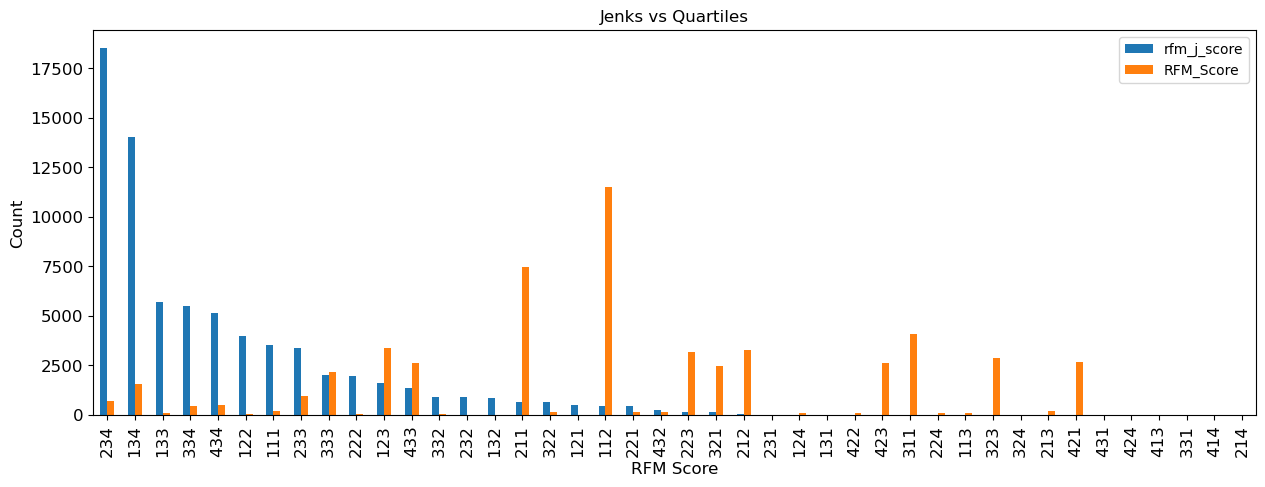

In [56]:
# 对比两种RFM得分（四分位 vs jenks）

df = rfm['rfm_j_score'].value_counts().to_frame().join(rfm['RFM_Score'].value_counts())
ax = df.plot(kind='bar', title ="Jenks vs Quartiles", figsize=(15, 5), legend=True, fontsize=12)
ax.set_xlabel("RFM Score", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Data preprocessing
rfm_values = rfm[['Recency', 'Frequency', 'Monetary']].values
rfm_scaled_values = scaler.transform(rfm_values)

# Step 2: Run K-means clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled_values)

# Step 3: Evaluate the clusters
silhouette_avg = silhouette_score(rfm_scaled_values, rfm['KMeans_Cluster'])

# Cluster counts and silhouette score
cluster_counts = rfm['KMeans_Cluster'].value_counts()
cluster_counts, silhouette_avg


(1    22429
 4    20935
 2    12954
 0    10875
 3     5583
 Name: KMeans_Cluster, dtype: int64,
 0.42060474754019395)

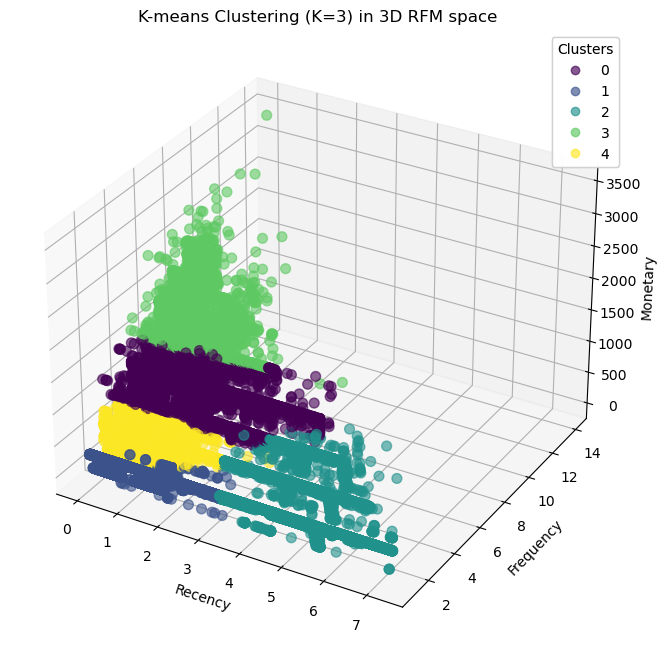

In [58]:
# 对结果进行3D可视化处理

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(rfm['Recency'], 
                     rfm['Frequency'], 
                     rfm['Monetary'], 
                     c=rfm['KMeans_Cluster'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     s=50)

# Title and labels
ax.set_title("K-means Clustering (K=3) in 3D RFM space")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [59]:

from lifetimes import BetaGeoFitter
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_history_alive
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import warnings

warnings.filterwarnings('ignore')

In [79]:
df['建单日期'] = pd.to_datetime(df['建单日期'])

currentDate = dt.datetime(2023,9,1)

df_rfm = df.groupby('用户id').agg({
    '建单日期': lambda x: (currentDate - x.min()).days /365.0
}).rename(columns={
    '建单日期': 'T'
})

In [80]:
df_rfm

,T
用户id,
1,1.994521
3,6.742466
5,6.545205
6,5.969863
7,4.315068
...,...
759185,0.030137
759236,0.027397
759482,0.008219


In [81]:
df_rfm = pd.merge(rfm, df_rfm, on='用户id')

In [82]:
df_rfm.head()

,Recency,Frequency,Monetary,T
用户id,,,,
1,1.994521,1,301.0,1.994521
3,2.852055,2,600.0,6.742466
5,6.545205,1,300.0,6.545205
6,0.304110,5,1096.0,5.969863
7,4.315068,1,300.0,4.315068


In [87]:
df_rfm.rename(columns={
    'Recency': 'recency',
    'Frequency': 'frequency',
    'Monetary': 'monetary_value'
})

,recency,frequency,monetary_value,T
用户id,,,,
1,1.994521,1,301.0,1.994521
3,2.852055,2,600.0,6.742466
5,6.545205,1,300.0,6.545205
6,0.304110,5,1096.0,5.969863
7,4.315068,1,300.0,4.315068
...,...,...,...,...
759185,0.030137,1,300.0,0.030137
759236,0.027397,1,300.0,0.027397
759482,0.008219,1,300.0,0.008219


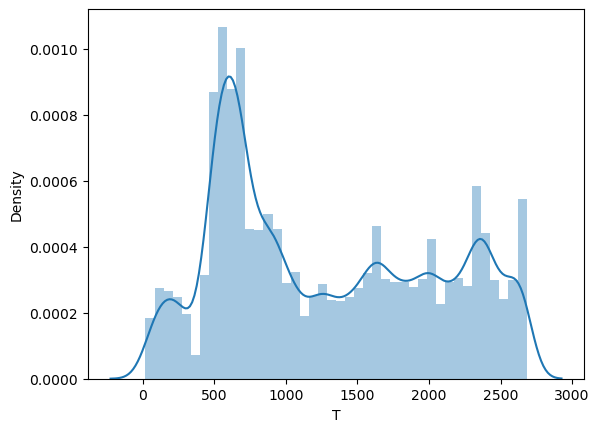

In [88]:
# 通过可视化查看Tenure的分布情况,此处是用户第一次产生订单的时间与当前统计截至时间的天数 
ax = sns.distplot(df_rfmt['T'])

In [89]:
# 适配BG/NBD模型 （Beta Geometric Negative Binomial Distribution ）

bgf = BetaGeoFitter(penalizer_coef=0.002)
bgf.fit(df_rfmt['frequency'], df_rfmt['recency'], df_rfmt['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,2.340871e+00,2.704605e-02,2.287861e+00,2.393881e+00
alpha,2.399916e+03,2.880761e+01,2.343453e+03,2.456379e+03
a,2.638237e-22,2.687181e-18,-5.266611e-18,5.267139e-18
b,2.785887e-13,2.827038e-09,-5.540716e-09,5.541273e-09


<AxesSubplot:title={'center':'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

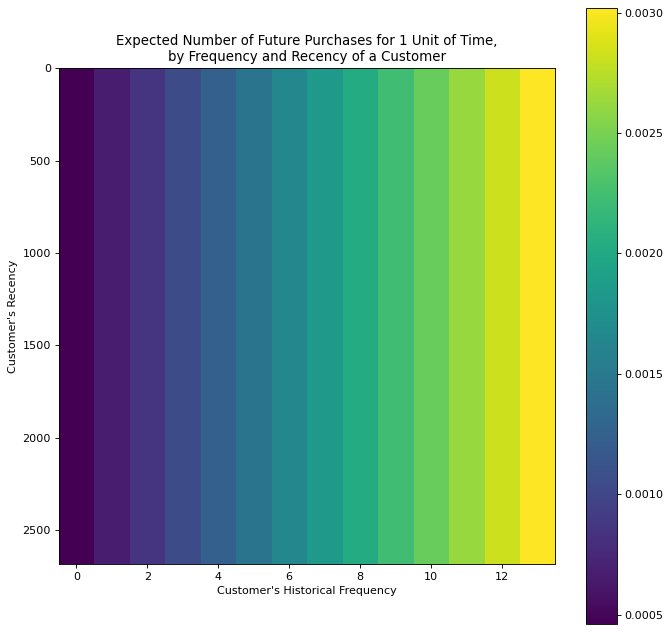

In [91]:
# 可视化结果
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plot_frequency_recency_matrix(bgf)

<AxesSubplot:title={'center':'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

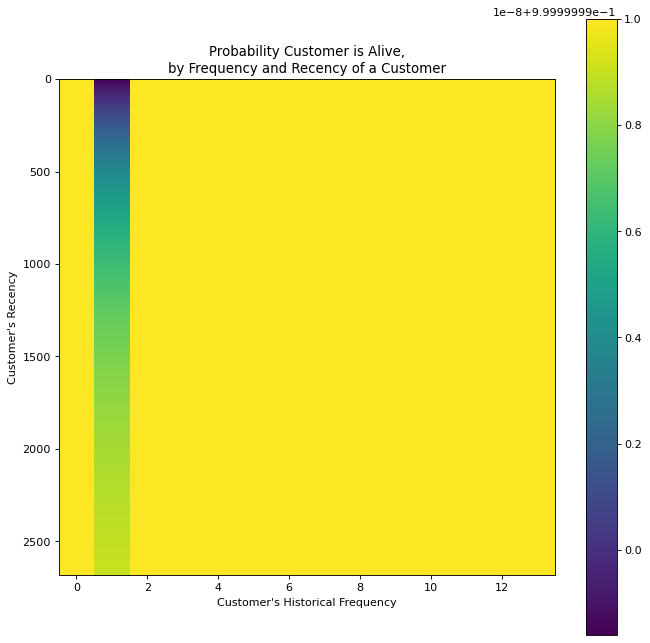

In [92]:
# 绘制每个客户留存的概率

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

plot_probability_alive_matrix(bgf)

In [93]:
# 接下来预测未来90天每一个用户可能产生的订单数

t = 1
df_rfmt['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                                                                      df_rfmt['frequency'], 
                                                                                      df_rfmt['recency'], 
                                                                                      df_rfmt['T'])


In [94]:
df_rfmt.sort_values(by='predicted_purchases').tail(10)

,frequency,recency,T,monetary_value,predicted_purchases
用户id,,,,,
17508,10.0,2635.0,2660.0,236.600000,0.002439
411273,7.0,901.0,1424.0,216.571429,0.002443
577328,6.0,100.0,835.0,298.833333,0.002578
344350,7.0,941.0,1222.0,156.428571,0.002579
176733,6.0,788.0,832.0,233.000000,0.002581
655156,6.0,547.0,570.0,231.333333,0.002808
522080,8.0,1050.0,1079.0,224.625000,0.002972
414404,9.0,1390.0,1415.0,209.555556,0.002973
138962,13.0,1835.0,1865.0,238.230769,0.003597


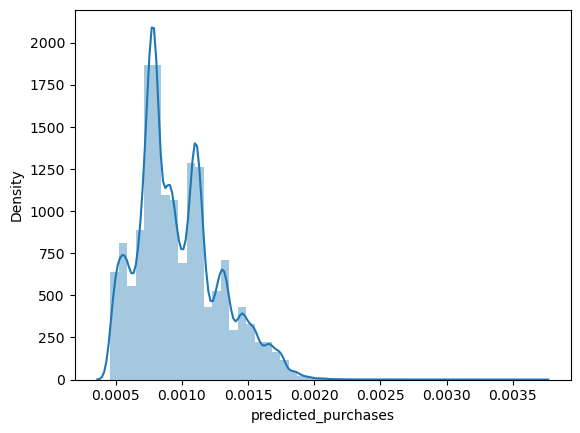

In [95]:
# 绘制预测的结果图形
ax = sns.distplot(df_rfmt['predicted_purchases'])

<AxesSubplot:title={'center':'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

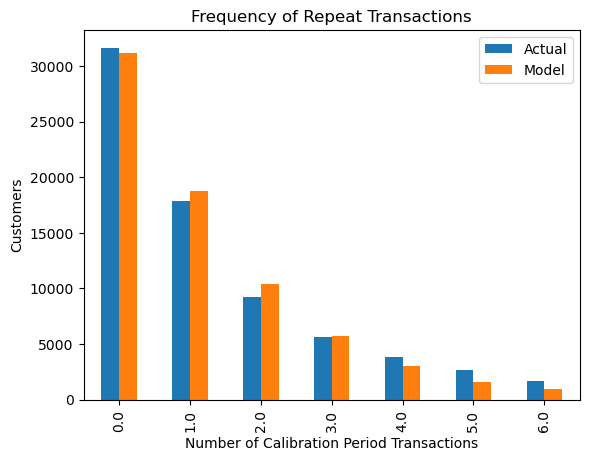

In [96]:
# 对比实际的数据，查看预测模型的准确性如何

plot_period_transactions(bgf)

In [98]:
# 使用Gamma-Gamma模型预测customer lifetime value
# 使用之前创建的原始df_rfmt数据框作为训练数据。我们将筛选出只包括回头客的数据

returning_customers = df_rfmt[ (df_rfmt['frequency'] > 1) & (df_rfmt['monetary_value'] > 0)]
returning_customers.sort_values(by='monetary_value', ascending=False).head()

,frequency,recency,T,monetary_value,predicted_purchases
用户id,,,,,
185585,2.0,451.0,1211.0,1290.000000,0.001202
79971,2.0,449.0,2241.0,889.900000,0.000935
74349,3.0,1166.0,2347.0,866.666667,0.001125
76915,3.0,1466.0,2368.0,866.666667,0.001120
352621,2.0,508.0,939.0,818.500000,0.001300


In [99]:
# 您可以使用corr()函数来检查它们是否相关，该函数运行皮尔逊相关性。

returning_customers[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.252982
frequency,0.252982,1.000000


[Text(0.5, 1.0, 'Frequency vs Monetary Value'),
 Text(0.5, 0, 'frequency'),
 Text(0, 0.5, 'monetary value')]

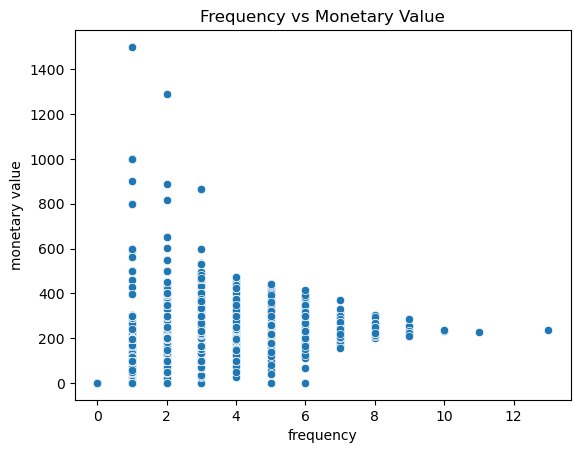

In [102]:
fig, ax = plt.subplots()
sns.scatterplot(x="frequency", y="monetary_value", data=df_rfmt, ax=ax)
ax.set(title="Frequency vs Monetary Value",xlabel="frequency",ylabel="monetary value")